Import Libraries

In [17]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set(style="whitegrid")


Load Dataset

In [18]:
# Confirmed, Deaths, and Recoveries data sources
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths    = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Load into pandas
confirmed = pd.read_csv(url_confirmed)
deaths = pd.read_csv(url_deaths)
recovered = pd.read_csv(url_recovered)

confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Inspect & Clean

In [19]:
print("Confirmed shape:", confirmed.shape)
print("Deaths shape:", deaths.shape)
print("Recovered shape:", recovered.shape)

# Rename columns for consistency
for df in [confirmed, deaths, recovered]:
    df.rename(columns={'Country/Region': 'Country'}, inplace=True)


Confirmed shape: (289, 1147)
Deaths shape: (289, 1147)
Recovered shape: (274, 1147)


Global Summary Over Time

In [27]:
# Sum over countries for each date
global_cases = confirmed.drop(columns=['Province/State', 'Lat', 'Long', 'Country']).sum()
global_deaths = deaths.drop(columns=['Province/State', 'Lat', 'Long', 'Country']).sum()
global_recoveries = recovered.drop(columns=['Province/State', 'Lat', 'Long', 'Country']).sum()

# Convert to DataFrame
timeline = pd.DataFrame({
    "Date": global_cases.index,
    "Confirmed": global_cases.values,
    "Deaths": global_deaths.values,
    "Recovered": global_recoveries.values
})

# Convert Date column to datetime
timeline["Date"] = pd.to_datetime(timeline["Date"], format="%m/%d/%y")

timeline.tail()


,Date,Confirmed,Deaths,Recovered
1138,2023-03-05,676024901,6877749,0
1139,2023-03-06,676082941,6878115,0
1140,2023-03-07,676213378,6879038,0
1141,2023-03-08,676392824,6880483,0
1142,2023-03-09,676570149,6881802,0


Plot Global Trends

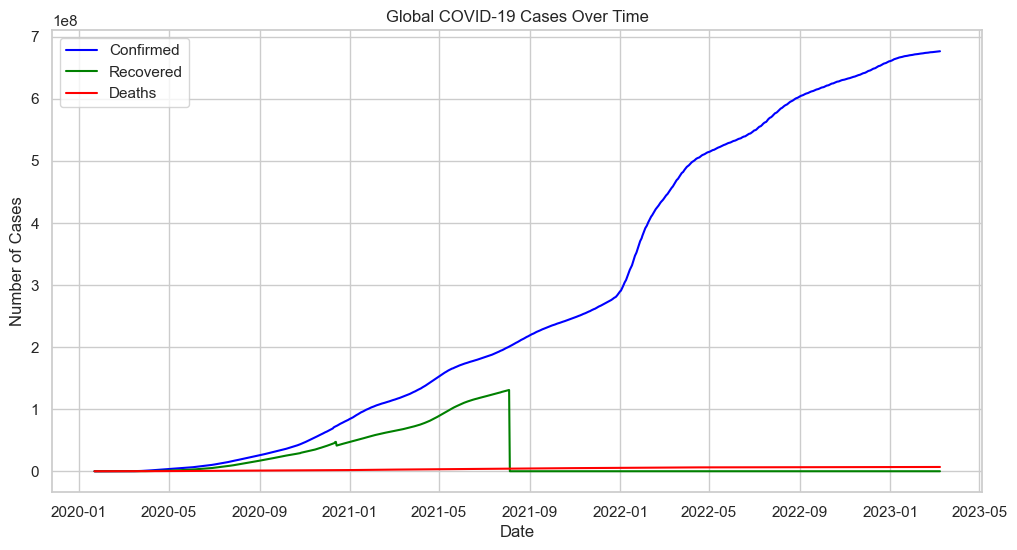

In [21]:
plt.figure(figsize=(12,6))
plt.plot(timeline["Date"], timeline["Confirmed"], label="Confirmed", color='blue')
plt.plot(timeline["Date"], timeline["Recovered"], label="Recovered", color='green')
plt.plot(timeline["Date"], timeline["Deaths"], label="Deaths", color='red')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


Interactive Plotly Version

In [22]:
fig = px.line(
    timeline, x="Date",
    y=["Confirmed", "Recovered", "Deaths"],
    title="Global COVID-19 Trends (Interactive)",
    labels={"value":"Cases", "Date":"Date"}
)
fig.show()


Compare Countries / Regions

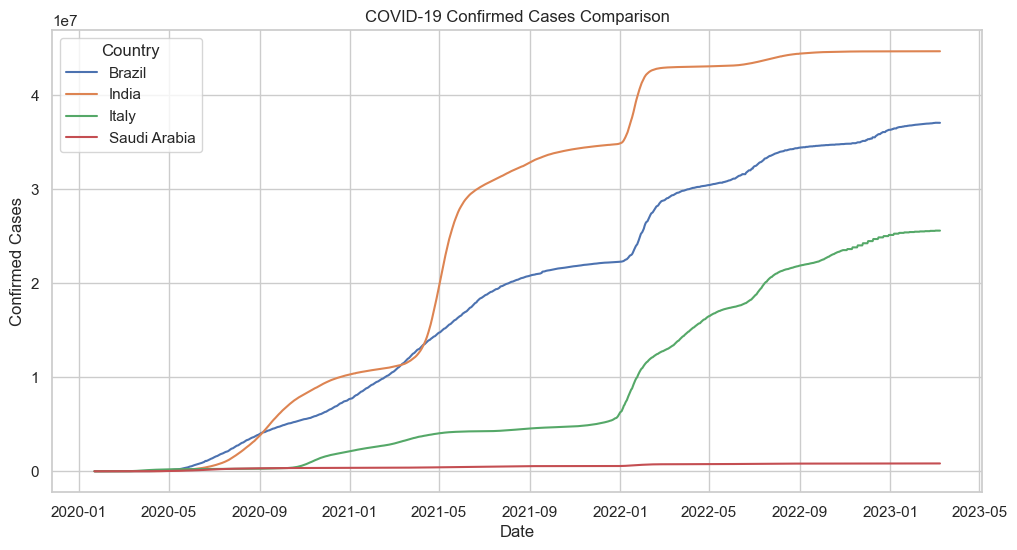

In [ ]:
countries = ["Saudi Arabia", "United States", "India", "Italy", "Brazil"]

country_data = confirmed.melt(
    id_vars=["Country", "Province/State", "Lat", "Long"],
    var_name="Date", value_name="Confirmed"
)
country_data["Date"] = pd.to_datetime(country_data["Date"], format="%m/%d/%y") 

# Filter for selected countries
subset = country_data[country_data["Country"].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x="Date", y="Confirmed", hue="Country")
plt.title("COVID-19 Confirmed Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()


Calculate Daily Growth Rate

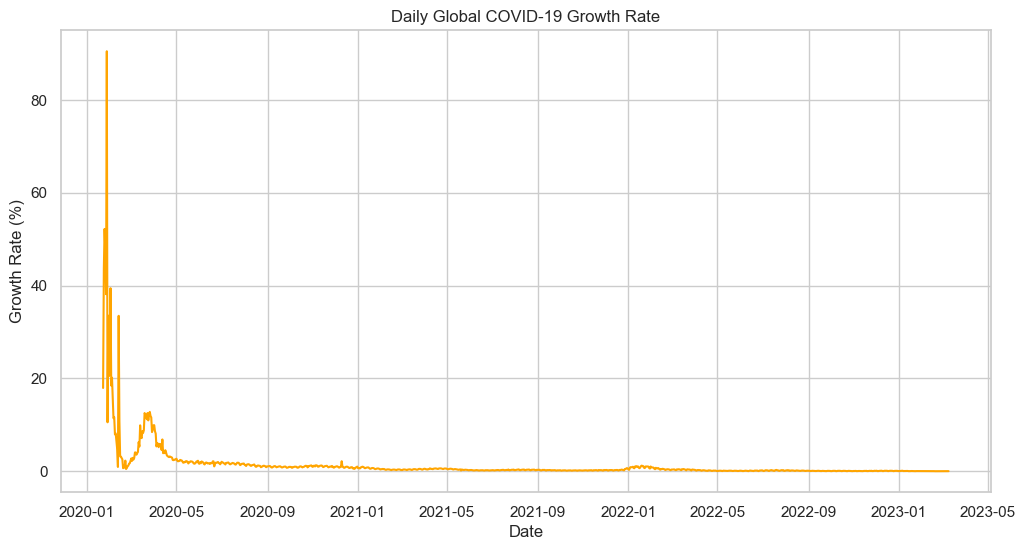

,Date,Confirmed,Deaths,Recovered,New Cases,Growth Rate (%)
1138,2023-03-05,676024901,6877749,0,56126.0,0.008303
1139,2023-03-06,676082941,6878115,0,58040.0,0.008585
1140,2023-03-07,676213378,6879038,0,130437.0,0.019293
1141,2023-03-08,676392824,6880483,0,179446.0,0.026537
1142,2023-03-09,676570149,6881802,0,177325.0,0.026216


In [ ]:
# Calculate daily growth rate (% change)
timeline["New Cases"] = timeline["Confirmed"].diff()
timeline["Growth Rate (%)"] = timeline["New Cases"] / timeline["Confirmed"].shift(1) * 100

plt.figure(figsize=(12,6))
plt.plot(timeline["Date"], timeline["Growth Rate (%)"], color='orange')
plt.title("Daily Global COVID-19 Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.show()

timeline.tail()
